## Clustering

### import data

In [2]:
from ucimlrepo import fetch_ucirepo 
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# fetch dataset 
secondary_mushroom = fetch_ucirepo(id=848) 
  
# data (as pandas dataframes) 
X = secondary_mushroom.data.features 
y = secondary_mushroom.data.targets 

df = pd.concat([X, y], axis=1)
# metadata 
print(secondary_mushroom.metadata) 
  
# variable information 
print(secondary_mushroom.variables) 

{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

In [3]:
df.head()

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width  ...  \
0               e          NaN          w        16.95       17.09  ...   
1               e          NaN          w        17.99       18.19  ...   
2               e          NaN          w        17.80       17.74  ...   
3               e          NaN          w        15.77       15.98  ...   
4               e          NaN          w        16.53       17.20  ...   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season class  
0               NaN       d      w     p  
1               NaN       d      u     p  
2               NaN       d      w     p  
3               NaN       d      w     p  
4               NaN       d      w     p  

[5 rows x 21 columns]

## K-Means, Agglomerative & DBSCAN

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Identify categorical and continuous features
categorical_features = [
    "cap-shape", "cap-surface", "cap-color", "does-bruise-or-bleed", 
    "gill-attachment", "gill-spacing", "gill-color", "stem-root",
    "stem-surface", "stem-color", "veil-type", "veil-color", "has-ring", 
    "ring-type", "spore-print-color", "habitat", "season"
]
continuous_features = ["cap-diameter", "stem-height", "stem-width"]

# Target column (for classification, not clustering)
target_col = "class"

# Handle missing values:
# - Replace missing values in categorical columns with the mode.
# - Replace missing values in continuous columns with the median.
imputer_categorical = SimpleImputer(strategy="most_frequent")
imputer_continuous = SimpleImputer(strategy="median")

df[categorical_features] = imputer_categorical.fit_transform(df[categorical_features])
df[continuous_features] = imputer_continuous.fit_transform(df[continuous_features])

# OneHot Encode categorical features
encoder = OneHotEncoder(sparse=False, drop="first")  # Avoid dummy variable trap
encoded_categorical = encoder.fit_transform(df[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

# Scale continuous features
scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(df[continuous_features])
scaled_continuous_df = pd.DataFrame(scaled_continuous, columns=continuous_features)

# Combine processed features
processed_data = pd.concat([scaled_continuous_df, encoded_categorical_df], axis=1)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

## PCA performance analysis

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


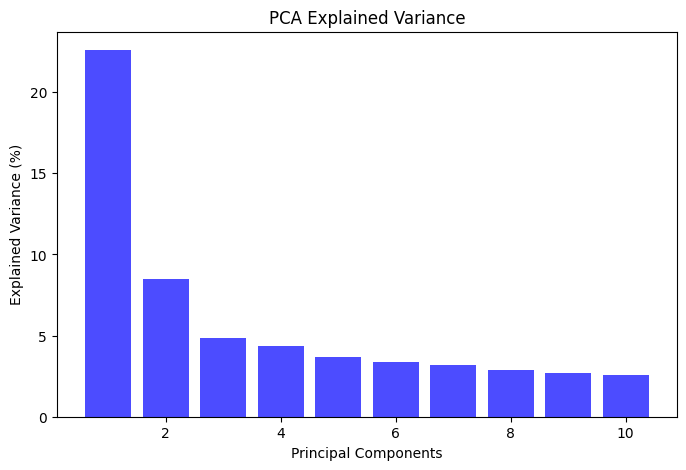

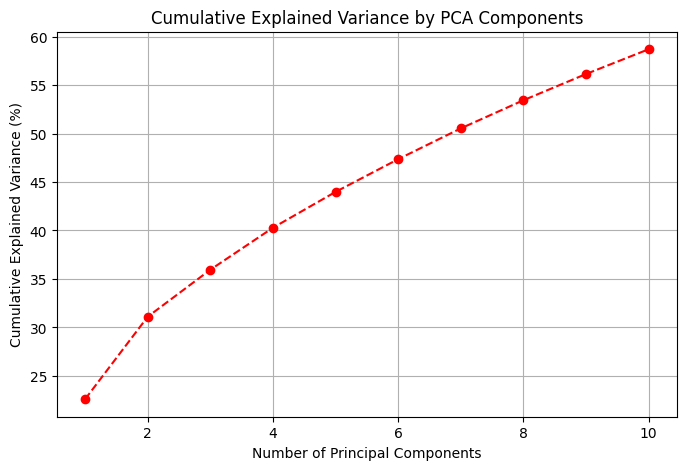

Feature Contributions to Principal Components:
                   PC1       PC2       PC3       PC4       PC5       PC6  \
cap-diameter  0.595944 -0.308711 -0.112928  0.525008  0.077102 -0.243309   
stem-height   0.501011  0.710151  0.080533 -0.214071  0.129196 -0.162815   
stem-width    0.596713 -0.352917  0.061771 -0.399245 -0.129591  0.337113   
cap-shape_c  -0.009797  0.008695 -0.008803 -0.021915  0.013030 -0.015309   
cap-shape_f  -0.000947 -0.008537 -0.145649  0.030980  0.417297 -0.081215   
...                ...       ...       ...       ...       ...       ...   
habitat_u     0.002059  0.007035 -0.003618  0.000609  0.002806  0.000295   
habitat_w    -0.000465  0.002081 -0.003507  0.010182 -0.004907  0.014278   
season_s     -0.001679 -0.013132  0.017426  0.019025  0.027237  0.049865   
season_u     -0.002436  0.019030 -0.031815  0.014045 -0.012758 -0.020155   
season_w      0.005645 -0.018540 -0.008356  0.020758  0.015631  0.022693   

                   PC7       PC8       P

In [6]:
# Step 1: Perform PCA on preprocessed data
n_components = 10  # Adjust based on dataset size
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(processed_data)

# Step 2: Explained Variance Plot
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, n_components + 1), explained_variance_ratio * 100, alpha=0.7, color="b")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance (%)")
plt.title("PCA Explained Variance")
plt.show()

# Step 3: Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), cumulative_variance * 100, marker="o", linestyle="--", color="r")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid()
plt.show()

# Step 4: Feature Contributions to PCA Components
components_df = pd.DataFrame(pca.components_, columns=processed_data.columns, index=[f"PC{i+1}" for i in range(n_components)])
print("Feature Contributions to Principal Components:")
print(components_df.T)


Based on the Explained Variance and Cumulative Variance Plots, we can draw the following insights:

1️⃣ The First Principal Component (PC1) Dominates the Variance
The first principal component (PC1) explains more than 20% of the variance.
PC2 contributes around 9-10%, while subsequent components contribute even less.
This means that most of the information in the dataset can be represented in just a few components.

2️⃣ Cumulative Explained Variance Grows Linearly
The first 5 principal components together explain only ~40-45% of the variance.
This suggests that the dataset has high dimensionality, and reducing it to just a few components may not fully capture the original structure.
If we want to preserve at least 80-90% of the variance, we would need more than 10 components.

3️⃣ PCA Alone May Not Be Sufficient for Dimension Reduction
Since the variance is spread across many components, using just 2 or 3 PCA components for clustering might result in information loss.
Instead of PCA, a non-linear dimensionality reduction method like t-SNE or UMAP might better capture complex structures.

4️⃣ Clustering in PCA Space Might Be Suboptimal
If we apply K-Means or DBSCAN on the first 2 PCA components, it might not perform well because too much information is lost.
A better approach would be:
Keep 10-15 PCA components instead of just 2.
Compare clustering performance with and without PCA to verify its impact.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Determine the range of clusters to test
k_values = range(2, 30)  # Testing k from 2 to 10
sse = []  # Sum of squared errors for Elbow Method
silhouette_scores = []  # Silhouette Score

# Apply K-Means for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(processed_data)
    
    sse.append(kmeans.inertia_)  # Sum of squared distances to cluster center
    silhouette_scores.append(silhouette_score(processed_data, labels))  # Silhouette Score

# Plot Elbow Method (SSE)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker="o", linestyle="-", color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (based on silhouette score): {optimal_k}")


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

KeyboardInterrupt: 

In [7]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(processed_data)
kmeans_silhouette = silhouette_score(processed_data, kmeans_labels)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [11]:
kmeans_silhouette

0.10387809870617792

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

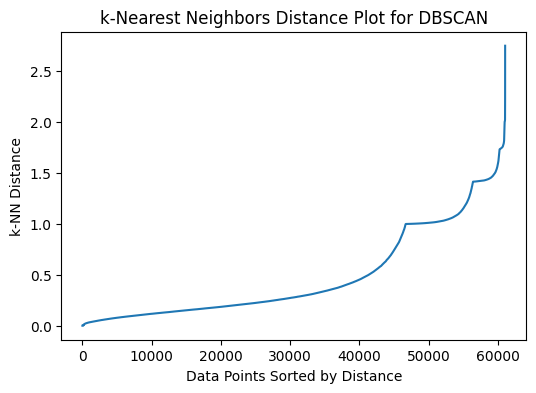

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Step 1: Find optimal `eps` using k-distance plot
neigh = NearestNeighbors(n_neighbors=10)  # Adjust n_neighbors for tuning
nbrs = neigh.fit(processed_data)
distances, indices = nbrs.kneighbors(processed_data)

# Sort distances and plot
distances = np.sort(distances[:, -1])
plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("k-NN Distance")
plt.title("k-Nearest Neighbors Distance Plot for DBSCAN")
plt.show()

# Manually check where the bend (elbow) occurs and set `eps` accordingly
optimal_eps = 1.2  # Adjust based on k-NN distance plot

# Step 2: Apply DBSCAN with tuned `eps` and `min_samples`
dbscan = DBSCAN(eps=optimal_eps, min_samples=10)  # Adjust `min_samples`
dbscan_labels = dbscan.fit_predict(processed_data)

# Step 3: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)

In [19]:
dbscan_silhouette = silhouette_score(processed_data, dbscan_labels)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [20]:
dbscan_silhouette

0.398869219135999

In [5]:
# Plot Clustering Results
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Text(0, 0.5, 'PCA Component 2')

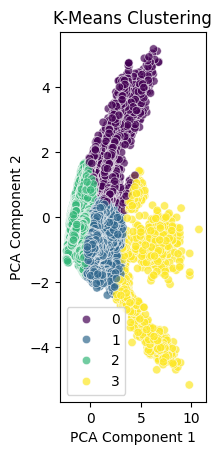

In [8]:
# K-Means
plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette="viridis", alpha=0.7)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

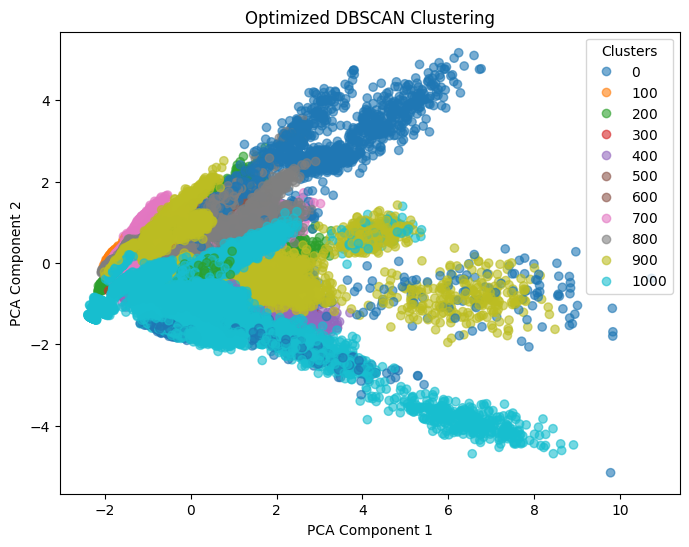

In [17]:
# Step 4: Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap="tab10", alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("Optimized DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

### t-SNE and UMAP Analysis

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

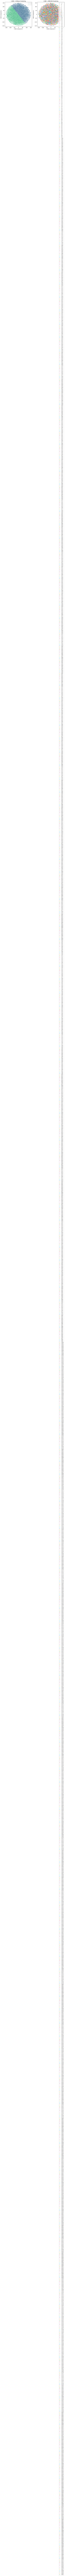

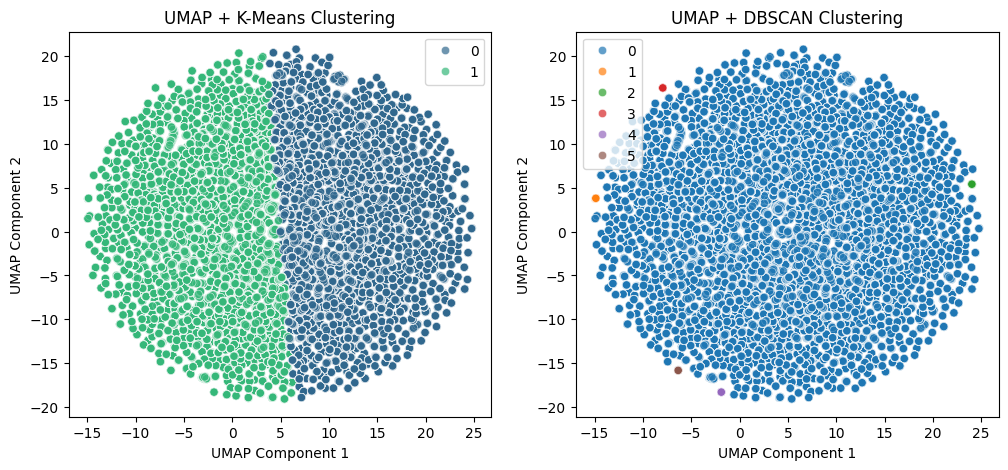

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data before t-SNE and UMAP
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Reduce dimensionality with PCA before t-SNE/UMAP (recommended)
pca = PCA(n_components=30)  # Keep 30 components to reduce noise but retain info
pca_data = pca.fit_transform(scaled_data)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_data = tsne.fit_transform(pca_data)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.3, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Apply Clustering (K-Means & DBSCAN)
optimal_k = 2  # Use optimal clusters from previous analysis
kmeans_labels_tsne = KMeans(n_clusters=optimal_k, random_state=42, n_init=10).fit_predict(tsne_data)
kmeans_labels_umap = KMeans(n_clusters=optimal_k, random_state=42, n_init=10).fit_predict(umap_data)

dbscan_labels_tsne = DBSCAN(eps=1.2, min_samples=10).fit_predict(tsne_data)
dbscan_labels_umap = DBSCAN(eps=1.2, min_samples=10).fit_predict(umap_data)

# Plot t-SNE Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=kmeans_labels_tsne, palette="viridis", alpha=0.7)
plt.title("t-SNE + K-Means Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=dbscan_labels_tsne, palette="tab10", alpha=0.7)
plt.title("t-SNE + DBSCAN Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Plot UMAP Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=kmeans_labels_umap, palette="viridis", alpha=0.7)
plt.title("UMAP + K-Means Clustering")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")

plt.subplot(1, 2, 2)
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=dbscan_labels_umap, palette="tab10", alpha=0.7)
plt.title("UMAP + DBSCAN Clustering")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


1️⃣ t-SNE + K-Means Clustering (Left Plot)
The two clusters are well-separated, with a clear boundary between them.
This suggests that K-Means works well in this t-SNE-transformed space.
The separation appears smooth and structured, indicating that the dataset might naturally form two groups.
✅ Good separation
✅ Two clear clusters (aligned with previous optimal k=2)
K-Means forces clusters even if some points are transitional

2️⃣ t-SNE + DBSCAN Clustering (Right Plot)
Too many small clusters (over 20+ detected).
DBSCAN struggles in this t-SNE space, forming many small, potentially meaningless clusters.
The -1 label (outliers) is also visible, but most points are assigned to very tiny clusters.
This indicates that t-SNE transformed the data in a way that removes density variation, making DBSCAN ineffective.
✅ Detects local variations
❌ Over-fragmentation (too many clusters)
❌ DBSCAN's density-based approach doesn't align with t-SNE space

3️⃣ UMAP + K-Means Clustering (Left Plot)
The two clusters are well-separated, indicating that K-Means effectively groups the data after UMAP dimensionality reduction.
The separation is almost perfectly linear, suggesting that the dataset might have a strong underlying structure that K-Means is able to exploit.
Since UMAP preserves both local and global relationships, this separation implies that K-Means works well with the transformed space.
However, the sharp boundary may indicate that K-Means is forcing clusters even when the data might have a smoother transition.
✅ Good separation
✅ Two clear clusters (aligned with the optimal k=2 found earlier)
Possible over-segmentation due to forced linear boundary

4️⃣ UMAP + DBSCAN Clustering (Right Plot)
Almost all points are assigned to a single cluster (label 0).
A few scattered points are identified as separate clusters (labels 1, 2, and 3), but they seem to be outliers rather than meaningful clusters.
This suggests that DBSCAN is struggling to find meaningful density-based clusters after UMAP transformation.
Possible Reasons for DBSCAN's Poor Performance:
UMAP transforms data into a uniform, dense structure, reducing natural density variations that DBSCAN relies on.
The eps value might not be optimal for the transformed space.
DBSCAN works better in high-dimensional space, and UMAP might have compressed too much information.
✅ DBSCAN successfully detects a few outliers
Fails to separate main clusters
UMAP may have reduced density differences that DBSCAN relies on

Final Insights & Next Steps
K-Means is a better choice for clustering after UMAP, as it captures clear structure.
DBSCAN does not perform well in UMAP space → It may work better on the original high-dimensional data.
If using DBSCAN, adjust eps or apply it before UMAP instead of after.
Try increasing UMAP's n_neighbors to allow better global separation.
Compare with PCA + Clustering to see which dimensionality reduction method works best.


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Compute Evaluation Metrics
metrics = {}

for method, data, labels in zip(["t-SNE", "UMAP"], [tsne_data, umap_data], [kmeans_labels_tsne, kmeans_labels_umap]):
    silhouette = silhouette_score(data, labels)
    db_index = davies_bouldin_score(data, labels)
    
    # Compute Trustworthiness
    original_nn = NearestNeighbors(n_neighbors=10).fit(scaled_data)
    low_dim_nn = NearestNeighbors(n_neighbors=10).fit(data)
    distances_orig, _ = original_nn.kneighbors(scaled_data)
    distances_low, _ = low_dim_nn.kneighbors(data)
    knn_preservation = np.mean(np.isin(distances_low.flatten(), distances_orig.flatten()))
    
    metrics[method] = {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index,
        "KNN Preservation": knn_preservation
    }

# Convert to DataFrame and Display
metrics_df = pd.DataFrame(metrics).T

ModuleNotFoundError: No module named 'ace_tools'

In [10]:
metrics_df

Silhouette Score  Davies-Bouldin Index  KNN Preservation
t-SNE          0.330291              1.236491          0.100567
UMAP           0.326736              1.240733          0.100000

📌 Final Conclusion

✅ t-SNE is slightly better than UMAP in this case, based on the silhouette score and Davies-Bouldin index.

✅ UMAP is very close to t-SNE, so if speed is important, UMAP is still a viable alternative.

Both have low KNN preservation, meaning that they distort some of the original relationships, which can impact clustering.

### Analysis base on Clustering

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Cluster Distribution:
 Cluster
1    30898
0    30171
Name: count, dtype: int64


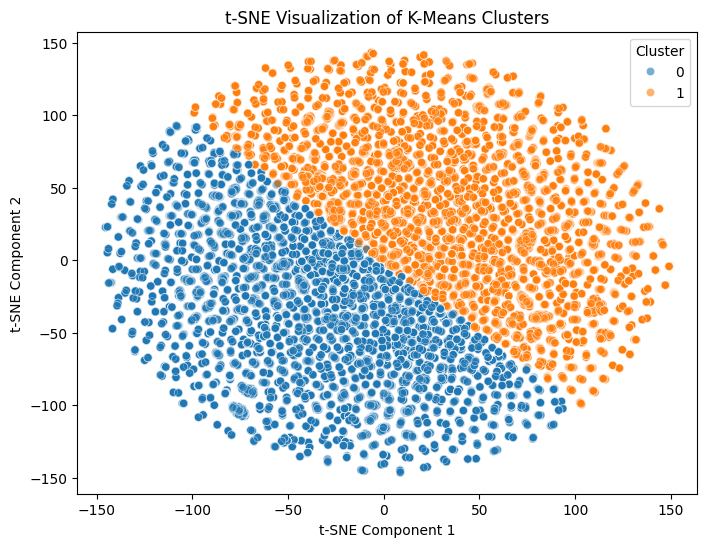

Cluster Feature Summary:
          cap-diameter  stem-height  stem-width  cap-shape_c  cap-shape_f  \
Cluster                                                                    
0            0.038672     0.113442    0.067489     0.030990     0.218355   
1           -0.037762    -0.110773   -0.065901     0.028481     0.220597   

         cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  cap-surface_e  \
Cluster                                                                      
0           0.000000     0.028073      0.17129     0.496271       0.063869   
1           0.111981     0.056670      0.06460     0.387112       0.021264   

         ...  habitat_g  habitat_h  habitat_l  habitat_m  habitat_p  \
Cluster  ...                                                          
0        ...   0.153657   0.054523   0.052202   0.032349   0.000000   
1        ...   0.107030   0.011522   0.051557   0.062917   0.011651   

         habitat_u  habitat_w  season_s  season_u  season_w  
Cluster  

Feature        P-Value
0   cap-diameter   2.424142e-21
1    stem-height  7.858506e-170
2     stem-width   3.394518e-61
3    cap-shape_o   0.000000e+00
4    cap-shape_p   2.747266e-69
..           ...            ...
93     habitat_u   7.082721e-27
94     habitat_w   3.428747e-79
95      season_s   0.000000e+00
96      season_u   1.041204e-23
97      season_w   5.672422e-19

[98 rows x 2 columns]

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.stats import ttest_ind

# Assume `processed_data` is the preprocessed dataset
# Standardize data before t-SNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_data = tsne.fit_transform(scaled_data)

# Apply K-Means
optimal_k = 2  # Use the best k found earlier
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(tsne_data)

# Convert cluster labels into DataFrame
processed_data['Cluster'] = cluster_labels

# Step 1: Cluster Distribution
cluster_counts = processed_data['Cluster'].value_counts()
print("Cluster Distribution:\n", cluster_counts)

# Step 2: Visualize Cluster Separation
plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=cluster_labels, palette="tab10", alpha=0.6)
plt.title("t-SNE Visualization of K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 3: Feature Importance per Cluster (Mean Comparison)
cluster_summary = processed_data.groupby('Cluster').mean()
print("Cluster Feature Summary:\n", cluster_summary)

# Step 4: Identify Key Differences Between Clusters (Statistical Test)
significant_features = []
for feature in processed_data.columns[:-1]:  # Exclude cluster label
    cluster_0 = processed_data[processed_data['Cluster'] == 0][feature]
    cluster_1 = processed_data[processed_data['Cluster'] == 1][feature]
    
    stat, p_value = ttest_ind(cluster_0, cluster_1, equal_var=False)
    if p_value < 0.05:  # Significant difference
        significant_features.append((feature, p_value))

# Convert to DataFrame for better viewing
significant_features_df = pd.DataFrame(significant_features, columns=["Feature", "P-Value"])

significant_features_df

In [12]:
# Show all rows and columns without truncation
pd.set_option("display.max_rows", None)  # No limit on rows
pd.set_option("display.max_columns", None)  # No limit on columns
pd.set_option("display.expand_frame_repr", False)  # Prevent column wrapping

# Now display the full DataFrame
display(cluster_summary)

cap-diameter  stem-height  stem-width  cap-shape_c  cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  cap-surface_e  cap-surface_g  cap-surface_h  cap-surface_i  cap-surface_k  cap-surface_l  cap-surface_s  cap-surface_t  cap-surface_w  cap-surface_y  cap-color_e  cap-color_g  cap-color_k  cap-color_l  cap-color_n  cap-color_o  cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  does-bruise-or-bleed_t  gill-attachment_d  gill-attachment_e  gill-attachment_f  gill-attachment_p  gill-attachment_s  gill-attachment_x  gill-spacing_d  gill-spacing_f  gill-color_e  gill-color_f  gill-color_g  gill-color_k  gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  gill-color_w  gill-color_y  stem-root_c  stem-root_f  stem-root_r  stem-root_s  stem-surface_g  stem-surface_h  stem-surface_i  stem-surface_k  stem-surface_s  stem-surface_t  stem-surface_y  stem-color_e  stem-color_f  stem-color_g  stem-color_k  stem-color_l  stem-color_n  stem-color_o  stem-color_p  stem-color_r  stem-color_u  stem-color_w  stem-color_y  veil-color_k  veil-color_n  veil-color_u  veil-color_w  veil-color_y  has-ring_t  ring-type_f  ring-type_g  ring-type_l  ring-type_m  ring-type_p  ring-type_r  ring-type_z  spore-print-color_k  spore-print-color_n  spore-print-color_p  spore-print-color_r  spore-print-color_u  spore-print-color_w  habitat_g  habitat_h  habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  season_s  season_u  season_w
Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
0            0.038672     0.113442    0.067489     0.030990     0.218355     0.000000     0.028073      0.17129     0.496271       0.063869       0.066587       0.099864       0.017368       0.041298       0.000000       0.059991       0.433330       0.042160       0.067581     0.069504     0.046866     0.013059     0.021544     0.406417     0.062809     0.044546     0.035829     0.037652     0.140532     0.103477                0.313646           0.277850           0.033840           0.000000           0.148089           0.081138           0.161844        0.161281        0.000000      0.019522      0.000000      0.048623      0.011667      0.157933      0.069703      0.127573      0.017765      0.031288      0.343940      0.152829       0.0234     0.000000     0.011700     0.089457        0.000000         0.01170        0.028968        0.005601        0.903285        0.025985        0.024461      0.052666      0.000000      0.035962      0.000000      0.000000      0.249909      0.024229      0.033973      0.017964      0.043684    

/var/folders/rf/g40pvt154wl8yhqr1q2x_nyr0000gn/T/ipykernel_96034/2612855582.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=feature, data=processed_data, palette="Set2")
/var/folders/rf/g40pvt154wl8yhqr1q2x_nyr0000gn/T/ipykernel_96034/2612855582.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=feature, data=processed_data, palette="Set2")
/var/folders/rf/g40pvt154wl8yhqr1q2x_nyr0000gn/T/ipykernel_96034/2612855582.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=feature, data=processed_da

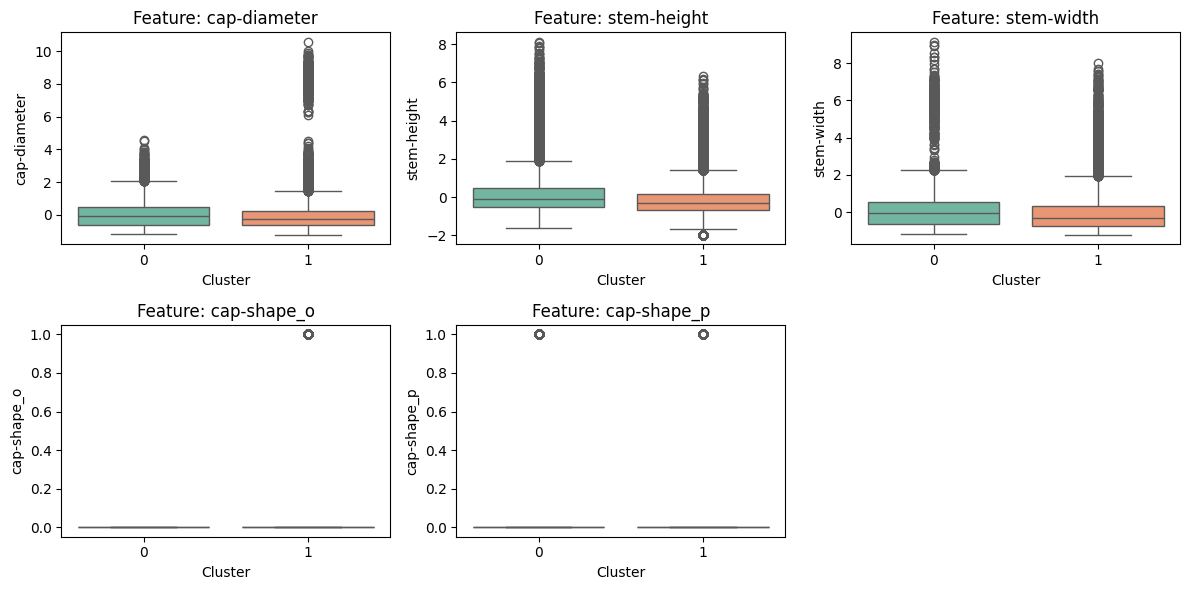

In [7]:
# Step 5: Boxplots to Compare Feature Distributions
top_features = significant_features_df["Feature"].tolist()[:5]  # Get top 5 features

plt.figure(figsize=(12,6))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x="Cluster", y=feature, data=processed_data, palette="Set2")
    plt.title(f"Feature: {feature}")
plt.tight_layout()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

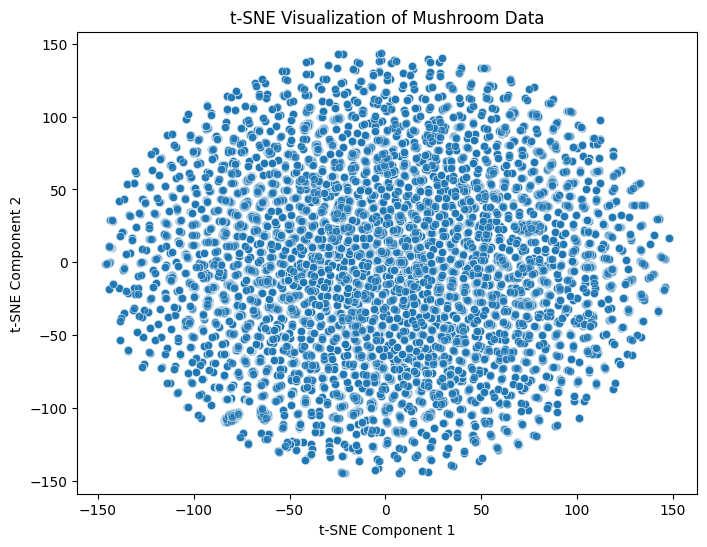

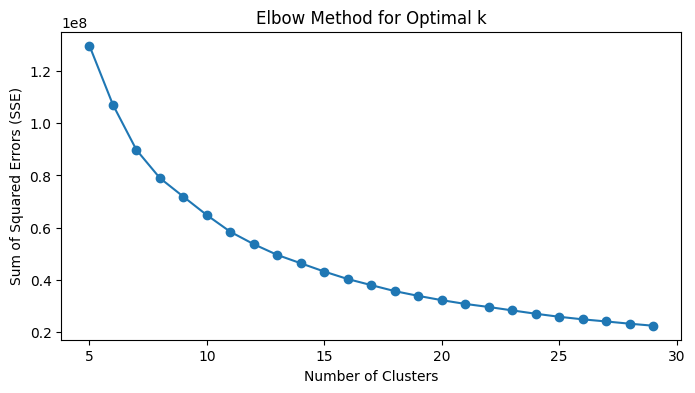

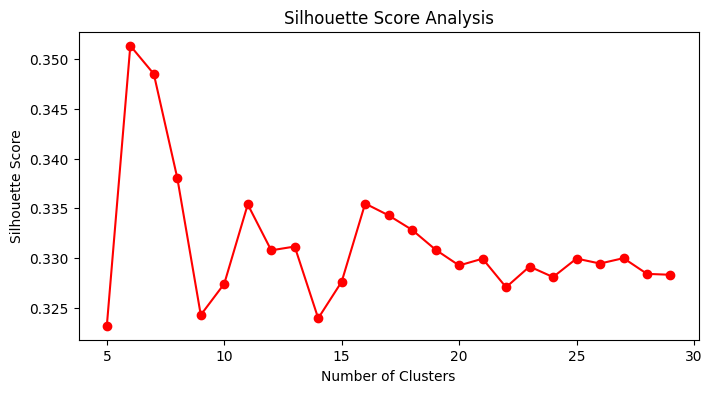

In [14]:
# Load and preprocess data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Step 1: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_data = tsne.fit_transform(scaled_data)

# Step 2: Visualize t-SNE for Cluster Counting
plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], alpha=0.6)
plt.title("t-SNE Visualization of Mushroom Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Step 3: Cluster Analysis
# K-Means (to find number of clusters)
cluster_range = range(5, 30)  # Testing k-values between 5 and 30
sse = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(tsne_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tsne_data, labels))

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

## TSNE Visualization

In [17]:
#create dummy variables
mushrooms = pd.get_dummies(df)

#subset data into dependent and independent variables x,y
LABELS = ['class_e', 'class_p']
FEATURES = [a  for a in mushrooms.columns if a not in LABELS ]
y = mushrooms[LABELS[0]]
x= mushrooms[FEATURES]

mushrooms.head()

cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  cap-surface_d  cap-surface_e  cap-surface_g  cap-surface_h  cap-surface_i  cap-surface_k  cap-surface_l  cap-surface_s  cap-surface_t  cap-surface_w  cap-surface_y  cap-color_b  cap-color_e  cap-color_g  cap-color_k  cap-color_l  cap-color_n  cap-color_o  cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  does-bruise-or-bleed_f  does-bruise-or-bleed_t  gill-attachment_a  gill-attachment_d  gill-attachment_e  gill-attachment_f  gill-attachment_p  gill-attachment_s  gill-attachment_x  gill-spacing_c  gill-spacing_d  gill-spacing_f  gill-color_b  gill-color_e  gill-color_f  gill-color_g  gill-color_k  gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  gill-color_w  gill-color_y  stem-root_b  stem-root_c  stem-root_f  stem-root_r  stem-root_s  stem-surface_f  stem-surface_g  stem-surface_h  stem-surface_i  stem-surface_k  stem-surface_s  stem-surface_t  stem-surface_y  stem-color_b  stem-color_e  stem-color_f  stem-color_g  stem-color_k  stem-color_l  stem-color_n  stem-color_o  stem-color_p  stem-color_r  stem-color_u  stem-color_w  stem-color_y  veil-type_u  veil-color_e  veil-color_k  veil-color_n  veil-color_u  veil-color_w  veil-color_y  has-ring_f  has-ring_t  ring-type_e  ring-type_f  ring-type_g  ring-type_l  ring-type_m  ring-type_p  ring-type_r  ring-type_z  spore-print-color_g  spore-print-color_k  spore-print-color_n  spore-print-color_p  spore-print-color_r  spore-print-color_u  spore-print-color_w  habitat_d  habitat_g  habitat_h  habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  season_a  season_s  season_u  season_w  class_e  class_p
0         15.26        16.95       17.09        False        False        False        False        False        False         True          False          False           True          False          False          False          False          False          False          False          False        False        False        False        False        False        False         True        False        False        False        False        False                    True                   False              False              False               True              False              False              False              False            True           False           False         False         False         False         False         False         False         False         False         False         False          True         False        False        False        False        False         True           False           False           False           False           False           False           False            True         False         False         False         False         False         False         False         False         False         False         False          True         False         True         False         False         False         False          True         False       False        True        False        False         True        False        False        False        False        False                False                 True                False                False                False                False                False       True      False      False      False      False      False      False      False     False     False     False      True    False     True
1         16.60        17.99       18.19        False        False        False        False        False        False         True          False          False           True          False          False          False          False          False          False          False          False        False        False        False        False        False        False         True        False        False        False        False        False                    True                   False              Fal

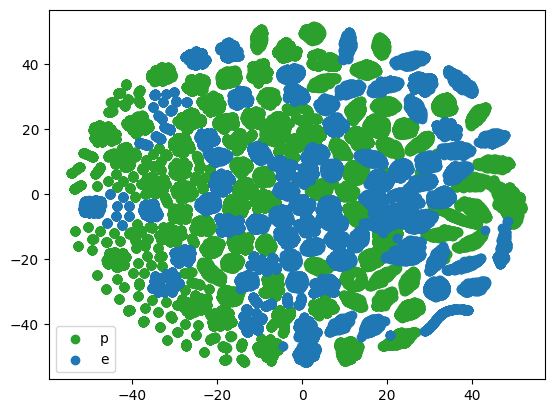

In [18]:
#import modules
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#create model
model = TSNE(learning_rate = 100)

#fit model
transformed = model.fit_transform(x.values)
xs = transformed[:,0]
ys = transformed[:,1]
df_trans = pd.DataFrame({'xs':xs, 'ys':ys})

#create plots
plt.scatter(df_trans.loc[y==0]['xs'], df_trans.loc[y ==0]['ys'], c= 'tab:green')
plt.scatter(df_trans.loc[y ==1]['xs'], df_trans.loc[y ==1]['ys'], c= 'tab:blue')
plt.legend(loc ='lower left', labels = ['p', 'e'])

plt.show()

TypeError: annotate() missing 1 required positional argument: 'text'

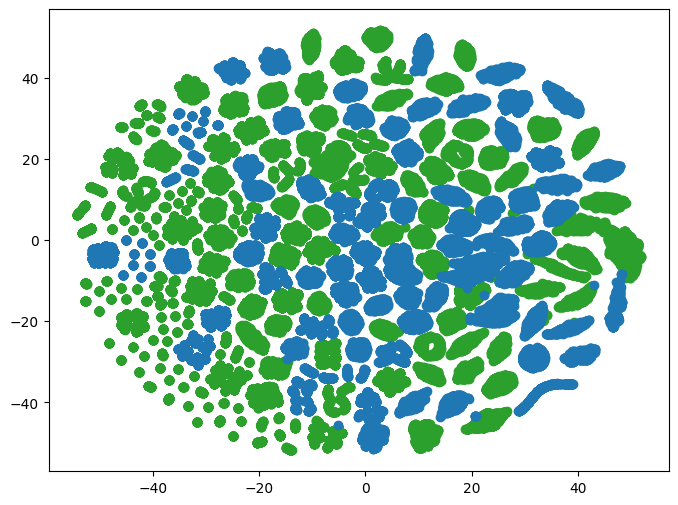

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Set number of clusters
num_clusters = 25  

# Create species labels using KMeans clustering
species = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
species_labels = species.fit_predict(x.values)  # Get cluster assignments

# Transform mushroom data using t-SNE
model = TSNE(learning_rate=100, random_state=42)
transformed = model.fit_transform(x.values)

# Create DataFrame for visualization
df_trans = pd.DataFrame({'xs': transformed[:, 0], 'ys': transformed[:, 1], 'cluster': species_labels, 'edibility': y.values})

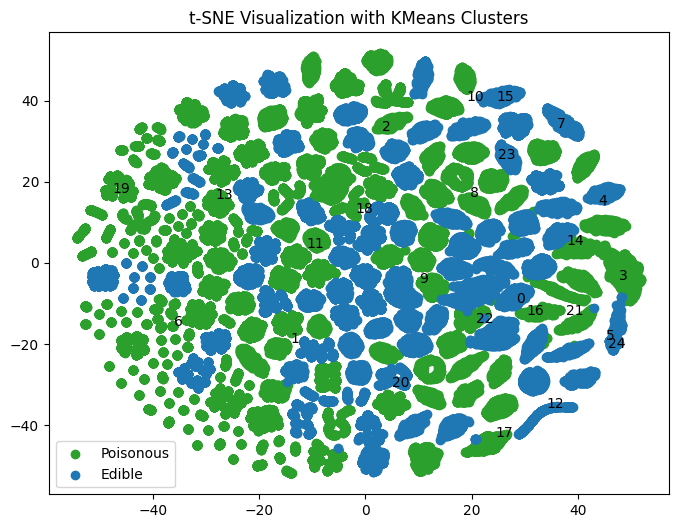

In [22]:
# Determine centroid locations of t-SNE clusters
cpx = []
cpy = []

for i in range(num_clusters):
    xi = df_trans.loc[df_trans['cluster'] == i]['xs'].mean()
    yi = df_trans.loc[df_trans['cluster'] == i]['ys'].mean()
    cpx.append(xi)
    cpy.append(yi)

# Plot edible and poisonous samples with different colors
plt.figure(figsize=(8, 6))
plt.scatter(df_trans[df_trans['edibility'] == 0]['xs'], df_trans[df_trans['edibility'] == 0]['ys'], c='tab:green', label='Poisonous')
plt.scatter(df_trans[df_trans['edibility'] == 1]['xs'], df_trans[df_trans['edibility'] == 1]['ys'], c='tab:blue', label='Edible')

# Annotate cluster centroids for each species
for i in range(len(cpx)):  # Loop through valid centroids only
    plt.annotate(text=str(i), xy=(cpx[i], cpy[i]), xytext=(-4, -4), textcoords='offset points')

# Insert legend
plt.legend(loc='lower left')
plt.title("t-SNE Visualization with KMeans Clusters")
plt.show()